# Assignment 1: Difference Equations
Kiran Ferrini

## Question 1:
Consider this first-order difference equation: $y_{t+1} = 2 + 0.9y_t$, with $y_0 = 1$.   
1. Solve for the particular solution.   
2. Solve for the homogeneous solution.    
3. Solve for the general solution.   
4. Solve for the exact solution.  
5. Is this dynamical system stable?  
6. Write a Python program that plots its first $T$ value for any first-order difference equation $y_{t+1} = a + by_t$ and initial condition $y_0$. Show your plot for the given parameters and initial condition and $T = 50$. 

### Solutions 
**1. Particular solution:**
$$
y = \frac{1}{1-b} \Rightarrow \frac{2}{1-0.9} \Rightarrow 20
$$

**2. Homogenous Solution:**
$$
y_t = c*b^t \Rightarrow c*0.9^t
$$

**3. General Solution:**
$$
y_t = \frac{1}{1-b} + c*b^t \Rightarrow 20 + c*0.9^t
$$

**4. Exact Solution:** 
$$
y_t = \frac{a}{1-b} + (y_0 - \frac{a}{1-b})b^t \Rightarrow 20 + (1 - 20)0.9^t \Rightarrow 20 - 19*0.9^t
$$

**5.** The system is stable because $|b| < 1$ so as time increases the exact solution converges on the particular solution ($20$).

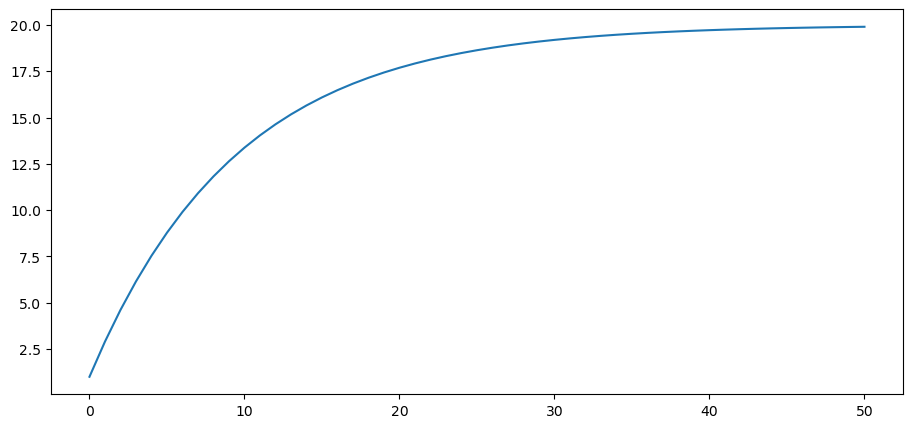

In [10]:
#6
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (11, 5)

def plottvalue(a, b, y0, T):
    y = np.zeros(T)
    x = np.arange(1,T+1) 
    yt = y0
    for i in range(T):
        yt1 = a + b * yt
        y[i] = yt1
        yt = yt1
    x = np.insert(x, 0, 0)
    y = np.insert(y, 0, y0)
    plt.plot(x,y)
    return plt.show()

plottvalue(2, 0.9, 1, 50) 

## Question 2:  
1. Now write some code that will simulate the stochastic first-order difference equation $y_{t+1} = a + y_t + \epsilon_{t+1}$ with $y_0 = \epsilon_0$ given. Here the shocks are independently and identically distributed where $\epsilon_{t+1} \sim N(0,\sigma^2)$.  
2. Plot a typical realization for $T = 153$ with a $a = 0.084$ and $\sigma = 0.195$ and compare it with the natural logarithm of the historical level of the S&P 500 given [here](https://www.multpl.com/s-p-500-historical-prices).  
3. Do you think the natural logarithm of asset prices has a unit root? Justify your answer by computing the root mean square error between the random simulation and the actual data. Also, show the sumulation and the data in a graph. 

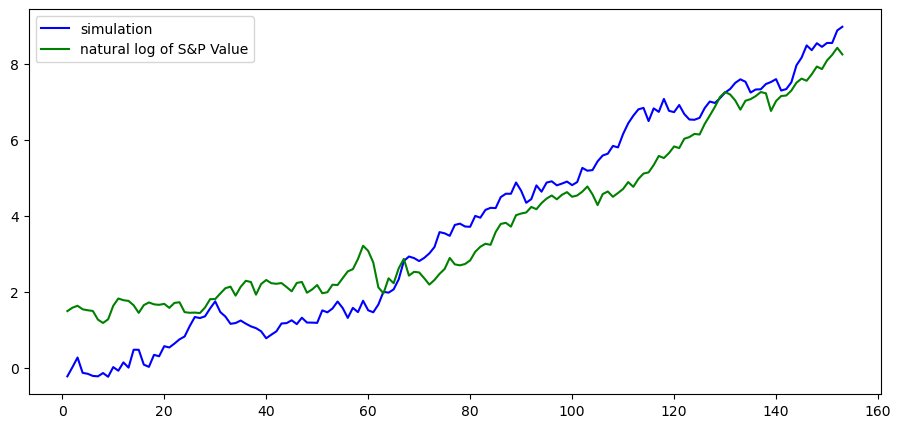

0.9602412009540031

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (11, 5)

#1
T = 153
a = 0.084
sd = 0.195
y = np.zeros(T)
x = np.arange(1,T+1) 
y0 = np.random.normal(0, sd, 1)
yt = y0[0]
for i in range(T):
    et1 = np.random.normal(0, sd, 1)
    yt1 = a + yt + et1[0] 
    y[i] = yt1
    yt = yt1
    
#2
import pandas as pd
df = pd.read_excel('sp500.xlsx')
df['lnv'] = np.log(df['Value'])

plt.plot(x, y, color='b', label='simulation')
plt.plot(x, df['lnv'], color='g', label='natural log of S&P Value')
plt.legend(loc='upper left')
plt.show()

#3
MSE = np.square(np.subtract(df['lnv'], y)).mean()
import math
sqMSE = math.sqrt(MSE)
sqMSE

Having a unit root means that in expectation the value remains constant, the variance scales linearly with time: $T\sigma^2$. The simulation is **does** have a unit root. The S&P Values match the simulation trend on the graph and have a relatively low MSE when compared to the simulation. Therefore it would seem that S&P Asset prices also have a unit root.